In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib

#matplotlib.style.use("")


[0.56256167 0.71472981 0.20363622 0.82981948 0.41003365 0.55632218
 0.09337895 0.72691354 0.80914354 0.97022788 0.86728072 0.64172407
 0.89791967 0.61454585 0.63835566 0.81338959 0.62616786 0.00825675
 0.7594889  0.38709627 0.51576465 0.25535166 0.33776835 0.95430696
 0.52548707 0.10539264 0.41533974 0.22698842 0.59812412 0.607901  ]


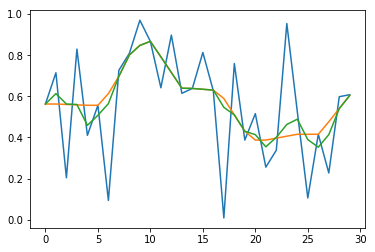

In [2]:
def smooth3s(x):
    if len(x) <= 2:
        return x
    y = np.empty_like(x)
    y[0], y[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y[j] = np.median(x[j-1:j+2])
    z = np.empty_like(y)
    z[0], z[-1] = (2*y[0]+y[1])/3, (2*y[-1]+y[-2])/3
    z[1:-1] = (y[1:-1] + y[:-2] + y[2:])/3
    return z

def smooth353(x):
    if len(x) <= 2:
        return x

    y3 = np.empty_like(x)
    y3[0], y3[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y3[j] = np.median(x[j-1:j+2])
        
    if len(y3) >= 5:
        y5 = np.empty_like(y3)
        y5[:2] = y3[:2]
        y5[-2:] = y3[-2:]
        for j in xrange(2,len(y3)-2):
            y5[j] = np.median(y3[j-2:j+3])
        y3[0], y3[-1] = y5[0], y5[-1]
        for j in xrange(1,len(x)-1):
            y3[j] = np.median(y5[j-1:j+2])

    return y3

def smooth353s(x):
    if len(x) < 3:
        return x
    
    x353 = smooth353(x)
    s = np.empty_like(x353)
    s[0], s[-1] = (2*x353[0]+x353[1])/3, (2*x353[-1]+x353[-2])/3
    s[1:-1] = (x353[1:-1] + x353[:-2] + x353[2:])/3
    
    return s
    

x= np.random.random((30,))
print x
plt.plot(x)
plt.plot(smooth353s(x))
plt.plot(smooth3s(x))

In [437]:
def plot(filename = "run_log.csv", limit=1000000):
    df=pd.read_csv(filename)
    x=df["rounds"].values
    n = len(x[x<=limit])
    x=x[:n]/1000
    y=df["reward_per_episode"].values[:n]
    loss=df["loss_ma"].values[:n]

    plt.figure(figsize=(13,6))

    plt.subplot(121)
    plt.plot(x,y, ls="None", marker=".", color="k")
    plt.plot(x,smooth353s(y), color="k")
    plt.ylim(-3.0, 6.0)
    plt.ylabel("Episode reward")
    plt.xlabel("Training steps, x1000")
    plt.grid()

    plt.subplot(122)
    plt.plot(x, loss, ls="None", marker=".", color="k")
    plt.plot(x, smooth353s(loss), color="k")
    plt.ylim(0.0, 0.2)
    plt.grid()
    plt.ylabel("Loss moving average")
    plt.xlabel("Training steps, x1000")
    
    
def plot_many(filenames, labels, limit=700000):
    colors = ['c','g','b','m','k','r']
    colors = ['k','C1','C2','C3','C4','C5','C6']
    rewards = {}
    errors = {}
    t = {}
    for fn in filenames:
        df = pd.read_csv(fn)
        r = df["rounds"].values
        n = len(r[r<=limit])
        #print n
        t[fn] = df["rounds"].values[:n]/1000.0
        rewards[fn] = df["reward_per_episode"].values[:n]
        errors[fn] = df["loss_ma"].values[:n]
        
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.ylim(-1.0, 6.0)
    plt.grid()

    for i, fn in enumerate(filenames):
        plt.plot(t[fn], rewards[fn], color=colors[i], linestyle=' ', marker=".")
        plt.plot(t[fn],smooth353s(rewards[fn]), color=colors[i], label=labels[i])
    plt.legend()
    plt.ylabel("Episode reward")
    plt.xlabel("Training steps, x1000")

    plt.subplot(122)
    plt.ylim(0.0, 0.2)
    plt.grid()
    for i, fn in enumerate(filenames):
        plt.plot(t[fn], errors[fn], color=colors[i], linestyle=' ', marker=".")
        plt.plot(t[fn],smooth353s(errors[fn]), color=colors[i], label=labels[i])
    plt.legend()
    plt.ylabel("Loss moving average")
    plt.xlabel("Training steps, x1000")
    
    

Base:

* Gamma: 0.8
* Hard update
* Hard update: 100000
* Hit reward: 5.0
* Shots max: 10
* Out of area reward: -1.0
* Miss reward: -0.01
* V-selectivity: False

Kind: diff
* Differential: Boltzman T=0.01

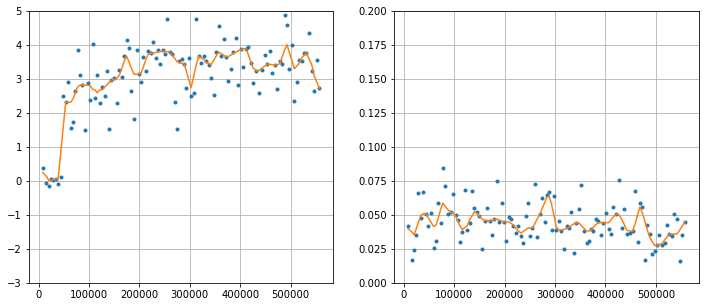

In [257]:
plot("logs1/diff.csv")

Kind: DQN

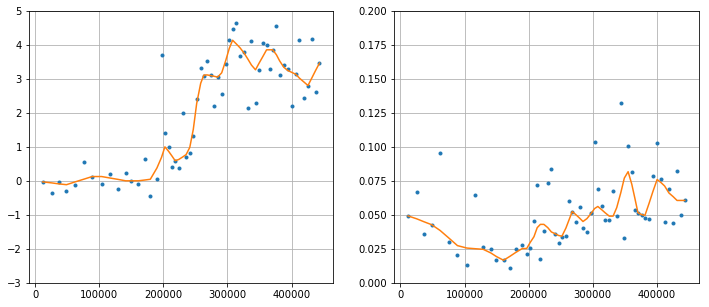

In [253]:
plot("logs1/dqn.csv")

Kind: DoubleDQN

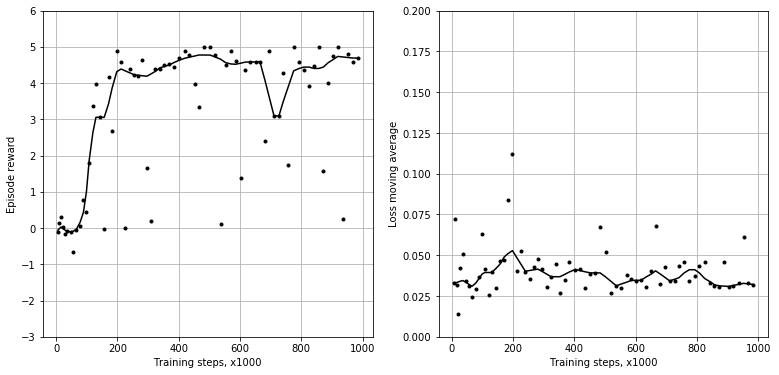

In [438]:
plot("logs1/diff_g1.0.csv")

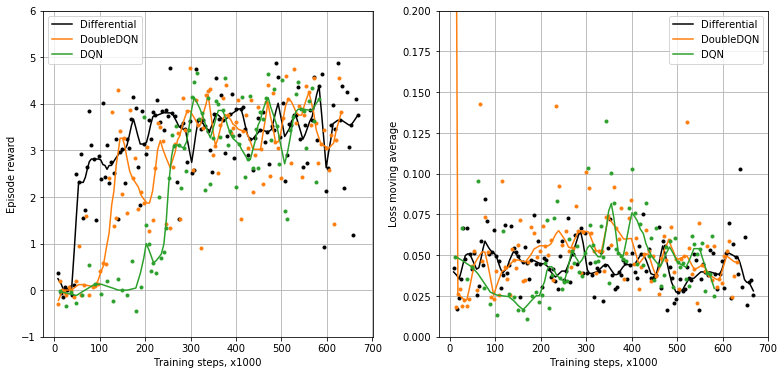

In [408]:
plot_many(["logs1/diff.csv", "logs1/double.csv", "logs1/dqn.csv"],
          ["Differential","DoubleDQN","DQN"], limit=1000000)

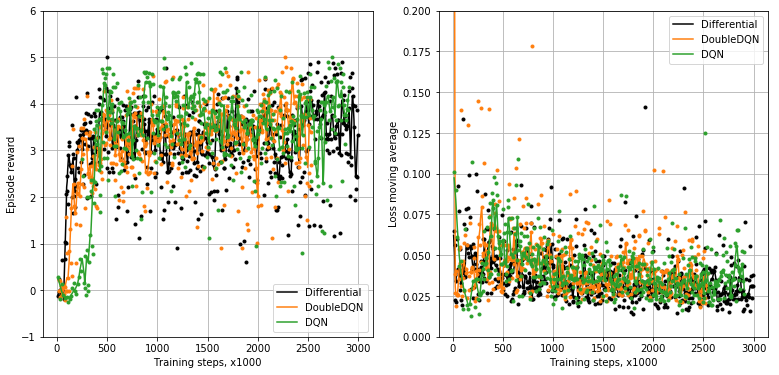

In [440]:
plot_many(["logs1/diff_g0.8.csv", "logs1/double_g0.8.csv", "logs1/dqn_g0.8.csv"],
          ["Differential","DoubleDQN","DQN"], limit=3000000)

Gamma: 0.9

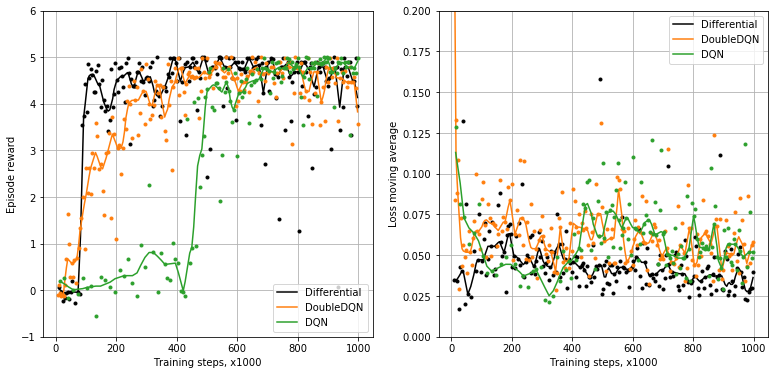

In [409]:
plot_many(["logs1/diff_g0.9.csv", "logs1/double_g0.9.csv", "logs1/dqn_g0.9.csv"],
          ["Differential","DoubleDQN","DQN"], limit=1000000)

Gamma: 0.99

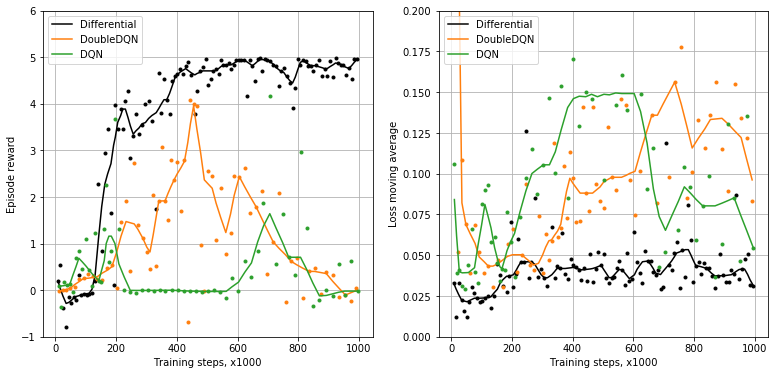

In [410]:
plot_many(["logs1/diff_g0.99.csv", "logs1/double_g0.99.csv", "logs1/dqn_g0.99.csv"],
          ["Differential","DoubleDQN","DQN"], limit=1000000)

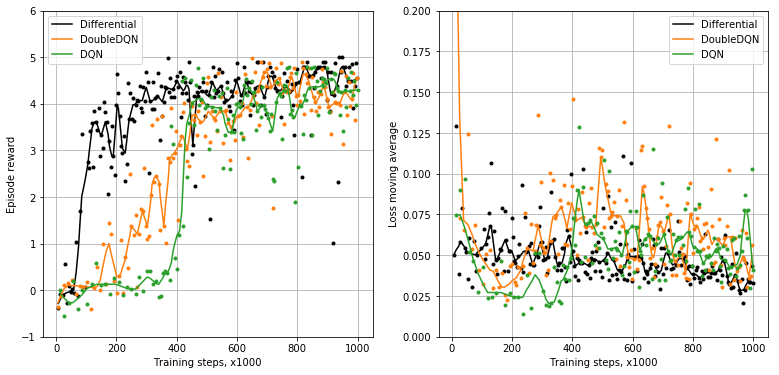

In [411]:
plot_many(["logs1/diff_g0.9_1.csv", "logs1/double_g0.9_1.csv", "logs1/dqn_g0.9_1.csv"],
          ["Differential","DoubleDQN","DQN"], limit=1000000)